# Time Series Forecasting with XGBoost / GBRT

In [12]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import DataProcess

In [13]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')


In [3]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
#reshape data for xgboost
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [4]:
def modelandeval(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test = np.array(y_test)  # Ensure y_test is a numpy array for consistency
    
    DataProcess.evaluate_regression_metrics(y_test, y_pred)
    DataProcess.plot(y_test, y_pred)
    return None
    

MSE: 0.0483606842942607
RMSE: 0.21991062797022953
MAE: 0.17311773731482058
R2: 0.47953121360780104


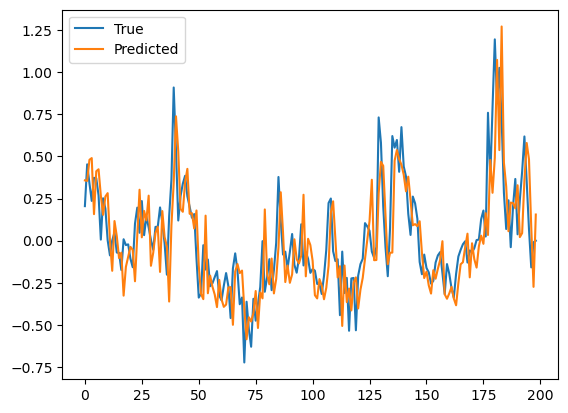

In [5]:
#XGBoost model

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

MSE: 0.03929480269151025
RMSE: 0.1982291671059288
MAE: 0.15365082357401888
R2: 0.5771003126438721


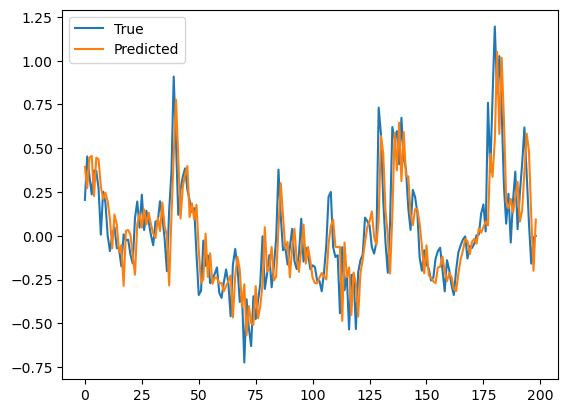

In [14]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
modelandeval(model,X_train, X_test, y_train, y_test)

MSE: 0.04059924258689799
RMSE: 0.2014925372982781
MAE: 0.1531819118015157
R2: 0.5630616310333516


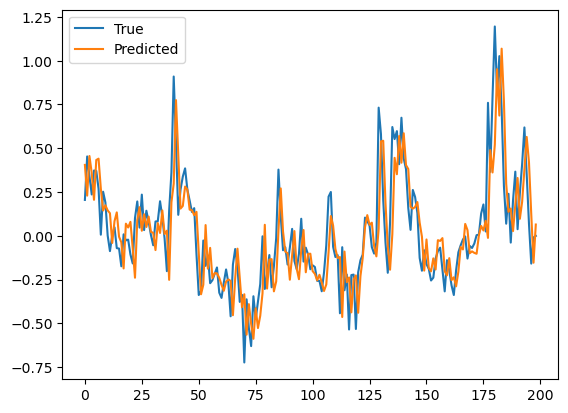

In [15]:
#GBRT Model
model =ensemble.GradientBoostingRegressor()
modelandeval(model,X_train, X_test, y_train, y_test)


MSE: 0.06526342643398347
RMSE: 0.2554670750487888
MAE: 0.20145576345044974
R2: 0.2976200223882458


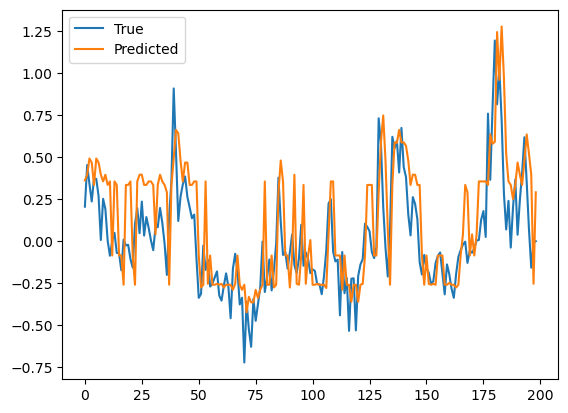

In [16]:
#AdaBoost Model
model = ensemble.AdaBoostRegressor()
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
#STACKING MODEL 

estimators = 
[
('rf'
 'gbrt'
 'ada
    
]

# Evaluation

# Using other data

In [ ]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(aaplHistIV, 'AAPL', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)


In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(googHistIV, 'GOOG', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(ndxHistIV, 'NDX', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

# Time Series Forecasting with GBRT